In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import argparse
import os
import matplotlib.pyplot as plt

from datasets.dataset_read import dataset_read
from model.build_gen import CustLeNet

In [2]:
target = 'usps'
source = 'mnist'

if target == 'svhn':
    scale = True
else:
    scale = False

batch_size = 128
all_use = 'no'

In [3]:
train_loader, val_loader = dataset_read(target, source, batch_size, scale, all_use)

In [4]:
a = iter(train_loader)

In [5]:
imgs, _ = next(a)

In [6]:
img = imgs[0]

In [7]:
from torchvision.utils import save_image, make_grid

In [8]:
save_image(img, 'img.jpg') # may be scaling is a problem
# make_grid(imgs, 'img.jpg')

In [9]:
device = torch.device("cuda")

model = CustLeNet(source, target).cuda()

source=mnist 	 target=usps


In [10]:
zs = model(imgs.cuda())
pred = zs.max(1, keepdim=True)[1]

In [11]:
folder = str(pred[0].cpu()[0].numpy())

In [12]:
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

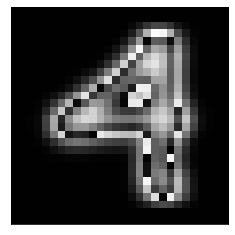

In [13]:
show(imgs[0])

In [20]:
from datetime import datetime

now = datetime.now()

n = now.strftime("%H_%M_%S")
save_image(img, folder+'/'+n+'.png') # may be scaling is a problem